In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/production.csv", parse_dates=["date"])
df.head()

,well_id,date,well_age_months,pressure,oil_production_bbl
0,W01,2019-01-01,1,2972.202997,4884.956235
1,W01,2019-02-01,1,2995.634475,4975.457604
2,W01,2019-03-01,4,3035.480320,5234.518953
3,W01,2019-04-01,5,2979.478047,5141.528393
4,W01,2019-05-01,6,3028.559453,5194.850364


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   well_id             240 non-null    object        
 1   date                240 non-null    datetime64[ns]
 2   well_age_months     240 non-null    int64         
 3   pressure            235 non-null    float64       
 4   oil_production_bbl  235 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 9.5+ KB


In [4]:
df.describe()

,date,well_age_months,pressure,oil_production_bbl
count,240,240.000000,235.000000,235.000000
mean,2020-12-15 17:00:00,23.470833,2951.957864,3596.891754
min,2019-01-01 00:00:00,0.000000,2845.531021,2298.651526
25%,2019-12-24 06:00:00,11.000000,2924.803468,3117.197211
50%,2020-12-16 12:00:00,23.000000,2954.858858,3538.838101
75%,2021-12-08 18:00:00,35.000000,2979.249449,4057.349386
max,2022-12-01 00:00:00,49.000000,3051.358235,5234.518953
std,NaN,13.928057,37.890300,635.708248


In [5]:
df.isna().sum()

well_id               0
date                  0
well_age_months       0
pressure              5
oil_production_bbl    5
dtype: int64

In [6]:
df.tail()

,well_id,date,well_age_months,pressure,oil_production_bbl
235,W05,2022-08-01,43,2924.335873,2680.564942
236,W05,2022-09-01,44,2941.549351,2440.529658
237,W05,2022-10-01,44,2880.555361,2298.651526
238,W05,2022-11-01,45,2912.513271,2576.187505
239,W05,2022-12-01,45,2927.696226,2358.641423


In [7]:
df["date"] = pd.to_datetime(df["date"])

In [8]:
df["year_month"] = df["date"].dt.to_period("M")
df_grouped = df.groupby(df["year_month"]).agg({"oil_production_bbl": "sum"}).reset_index()
df_grouped["year_month"] = df_grouped["year_month"].dt.to_timestamp()
df_grouped["year_month"].head()

0   2019-01-01
1   2019-02-01
2   2019-03-01
3   2019-04-01
4   2019-05-01
Name: year_month, dtype: datetime64[ns]

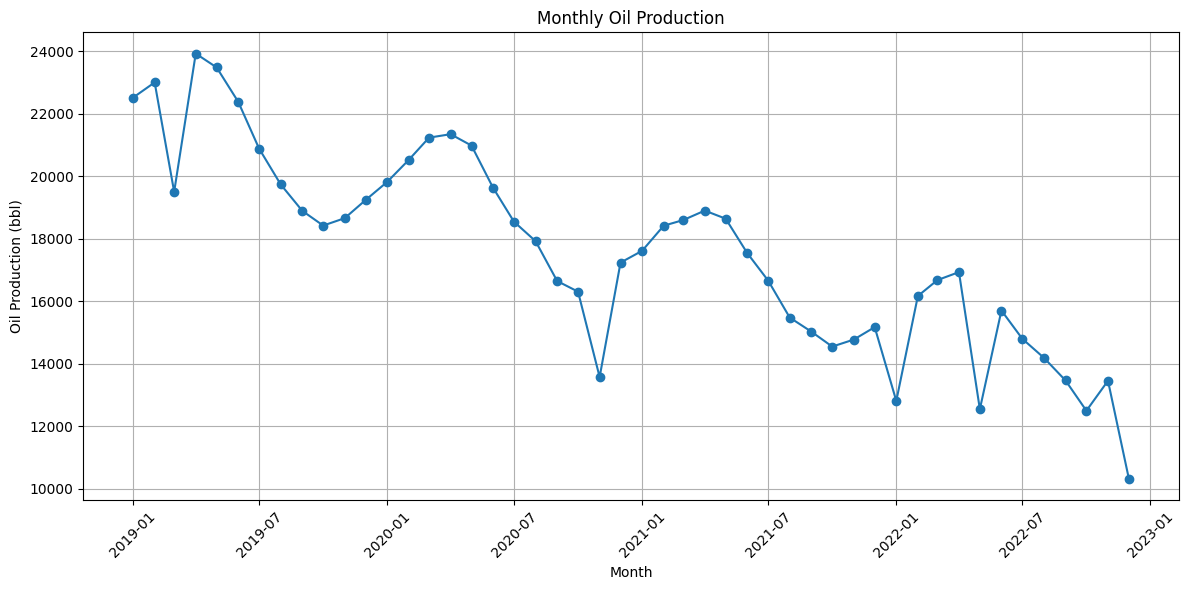

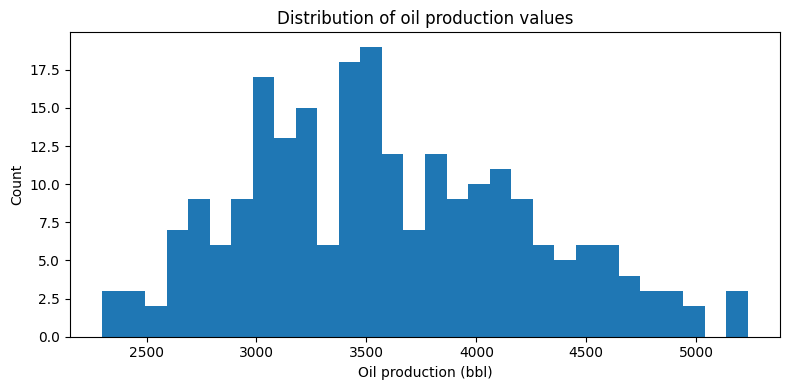

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df_grouped["year_month"], df_grouped["oil_production_bbl"], marker='o')

plt.title("Monthly Oil Production")
plt.xlabel("Month")
plt.ylabel("Oil Production (bbl)")

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("outputs/total_monthly_production(J).png")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(df["oil_production_bbl"], bins=30)

plt.title("Distribution of oil production values")
plt.xlabel("Oil production (bbl)")
plt.ylabel("Count")

plt.savefig("outputs/prod_histogram(J).png")
plt.tight_layout()
plt.show()

In [10]:
df_grouped.describe()

,year_month,oil_production_bbl
count,48,48.000000
mean,2020-12-15 17:00:00,17609.782546
min,2019-01-01 00:00:00,10323.455378
25%,2019-12-24 06:00:00,15135.374366
50%,2020-12-16 12:00:00,17766.296803
75%,2021-12-08 18:00:00,19654.015064
max,2022-12-01 00:00:00,23919.299237
std,NaN,3193.855458
